Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-230.866,-240.498,2.59453e-74
2,140.151,4.0,-227.813,-237.431,5.5715e-73
3,140.302,4.0,-224.789,-234.392,1.16285e-71
4,140.452,4.0,-221.793,-231.382,2.35892e-70
5,140.603,4.0,-218.826,-228.401,4.65093e-69
6,140.754,4.0,-215.887,-225.448,8.91259e-68
7,140.905,4.0,-212.977,-222.523,1.65999e-66
8,141.055,4.0,-210.095,-219.627,3.00501e-65
9,141.206,4.0,-207.241,-216.76,5.28718e-64


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,157.186,7.21608,-63.9731,-72.3414,0.277564
2,156.884,4.64322,-63.5302,-71.9143,0.425451
3,156.583,7.77889,-64.5073,-72.9073,0.157605
4,155.075,6.57286,-63.492,-71.9756,0.400152
5,155.528,6.25126,-63.0502,-71.5081,0.638607
6,154.925,5.04523,-63.5502,-72.0425,0.374235
7,155.075,5.76884,-63.105,-71.5886,0.58921
8,157.337,6.09045,-63.1119,-71.4723,0.661921
9,154.472,6.33166,-63.7743,-72.293,0.291332


### Snippet 4.23

Density of sigma

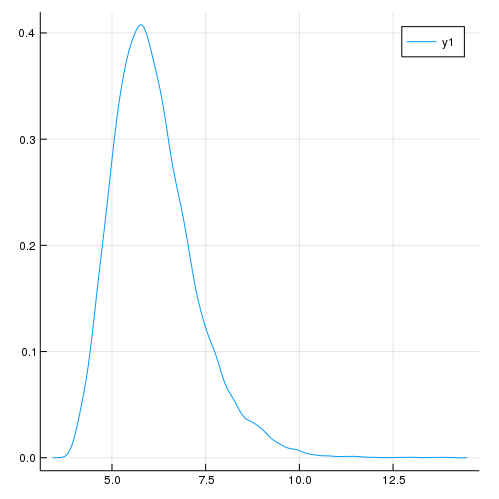

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*